# Research of video games market

## Objectives

We have access to historical data on game sales, user and expert ratings, genres, and platforms for the period from 1980 to 2016, broken down by macro-regions: Europe, North America, Japan, and the rest of the world.
In this current study, we need to identify patterns that determine the success of a game in the market. This will allow us to focus on potentially popular products and plan advertising campaigns accordingly.
### Let' a take a look at the dataset and evaluate the information provided

In [1]:
#import of essential libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

In [2]:
df=pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Minor gaps in the `Year_of_Release` column indicate a possible error during data preservation or transfer.
Nearly half of the games are not rated by critics, and almost 10,000 games lack user ratings. It's hard to believe that there are so many games without any ratings. It may be worth reaching out to the developers to clarify the data sources.
Approximately 7,000 games in the table are presented without an ESRB rating. It is likely that the data was not loaded or that the ESRB rating takes some time to be assigned.

## Data preprocessing

### Now convert the columns to lowercase for ease of further data processing.

In [3]:
df.columns=df.columns.str.lower()
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Let's handle the missing values

In [4]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

`tbd` is highly likely an abbreviation for "to be determined," indicating that the game is not yet rated. We can consider it as a regular missing value and replace it with NaN for consistency and convenience.

In [5]:
df.user_score.replace('tbd', np.nan, inplace=True)

### Conversion of data types

Convert the `user_score` column to the float data type for further processing of numerical data.

In [6]:
df.user_score=df.user_score.apply(pd.to_numeric, errors='coerce')

Сonvert the 'year_of_release' column to the integer data type, removing any trailing zeros for simplicity. 

In [7]:
df.year_of_release=df.year_of_release.astype('Int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Let's create a histogram of game release frequencies by year.

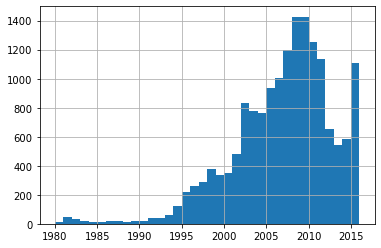

In [9]:
df['year_of_release'].hist(bins=36);

and take a look at the table:

In [10]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Three-quarters of the games were released after 2003, and the peak of releases occurred between 2007 and 2012.
There is a significant variation in sales revenue across regions: the median sales in North America are four times higher than in Europe.

Let's add a column with the total frequency of game releases.

In [11]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df['total_sales'].head()                                        

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

/Users/ivanshurgalin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


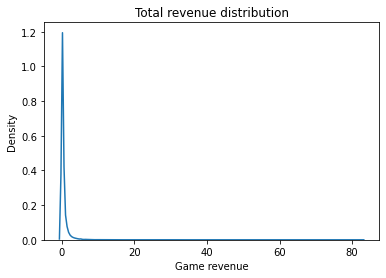

In [12]:
(sns.distplot(df['total_sales'], hist=False)
     .set(title='Total revenue distribution', xlabel='Game revenue'));

In [13]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


So, the circulation of half of the games did not exceed 170,000 copies. The distribution is skewed to the right: high game sales are only characteristic of true bestsellers.

## Exploratory Data Analysis

### Let's examine the game sales by their release years.

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


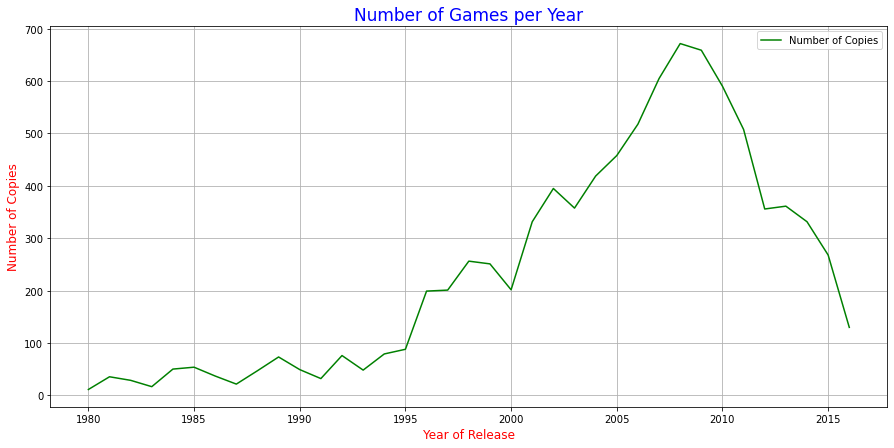

In [14]:
df_sum_games_years = df.groupby(['year_of_release']).agg({'name':'count'}).reset_index()
df_sale = (df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))).reset_index()
display(df_sum_games_years.head())
plt.figure(figsize=(15, 7))
plt.plot(df_sale['year_of_release'], df_sale['total_sales'], '-g', label='steelad price');
plt.title('Number of Games per Year', fontsize=17, color='blue')
plt.xlabel('Year of Release',fontsize=12, color='red')
plt.ylabel('Number of Copies',fontsize=12, color='red')
plt.legend(['Number of Copies', 'New Games Released'])
plt.grid(True)
plt.show()

**Conclusion:**

- Prior to 1995, game circulation did not exceed 100,000 copies.
- The peak of game releases occurred between 2007 and 2012.
- Starting from 2008, there is an evident trend of declining circulations, likely associated with the growth of the mobile application market.
- The majority of games in the dataset were released from 2004 to 2014. For further analysis, it seems suitable to focus on the data from the last 10 years (2006-2016) to understand the reasons behind the declining trend and make adequate forecasts for the future.

### Now let's assess the sales by platforms.

In [15]:
# Let's create a dataframe with the grouping of total game sales by platforms and release year.
sales_by_platform=(df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
                   .reset_index())
sales_by_platform.head()

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
3,DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN


In [16]:
#We will save the top 10 platforms based on sales and record their names and total sales.
best_platforms=(df.groupby('platform')['total_sales']
                .sum()
                .sort_values(ascending=False)[:10]
                .reset_index())
best_platforms.head()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Let's extract these platforms from the dataframe and visualize the sales data by year.

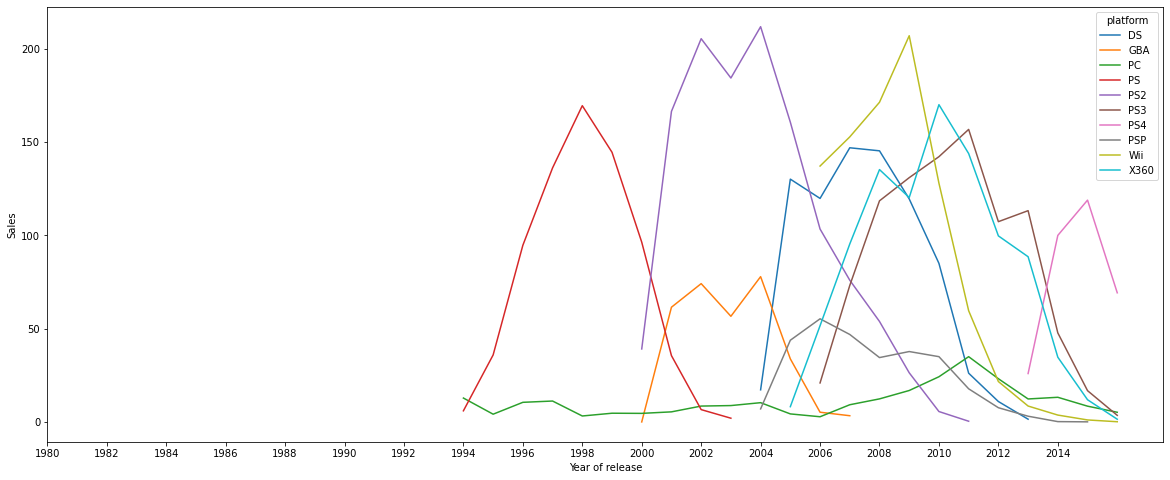

In [17]:
sales_by_platform['top10'] = (sales_by_platform.platform.isin(best_platforms.platform) == True)
(sales_by_platform[sales_by_platform['top10']==True]
     .set_index('platform').T.drop('top10')
     .plot(figsize=(20,8))
     .set(xlabel='Year of release', ylabel='Sales'))
plt.xticks([y for y in range(1980,2016)[1980%2::2]]);

And visualize the data via barplot. 

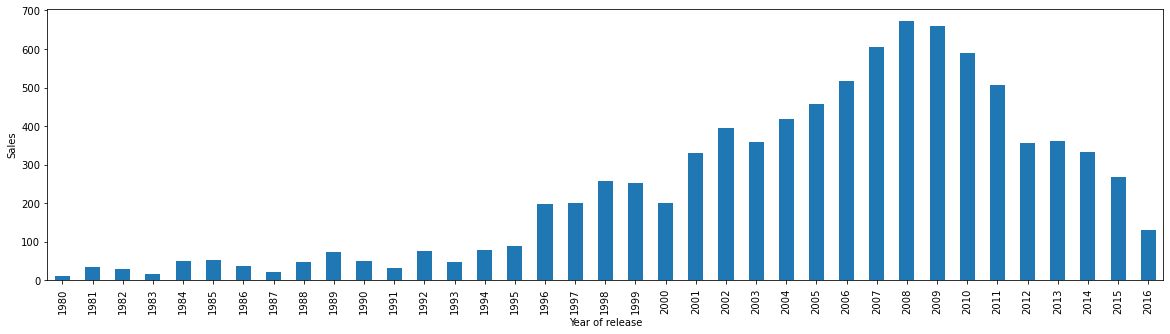

In [18]:
(sales_by_platform.set_index('platform')
     .drop(columns='top10')
     .sum()
     .plot(kind ='bar', figsize=(20,5))
     .set(xlabel='Year of release', ylabel='Sales'));

**Conclusions:**

After 1995, game sales started to grow actively. On average, platforms remain on the market for about 10 years, except for personal computers (PC).

Platforms typically reach the peak of their popularity within two to three years and then gradually lose their audience.

The PC platform, on the other hand, has been present in the video game market since 1994, and its popularity reached its peak in 2011. However, by the end of 2016, it remains one of the most popular platforms.

### Analysis of the relevant period (2013-2016)

As mentioned earlier, platforms typically have a lifespan of around 10 years, and the peak of game releases occurred between 2007 and 2012 (a span of five years). However, the gaming market is highly dynamic, and gaming platforms often change.

It seems appropriate to focus on the period from 2013 to 2016 since it includes the latest gaming platform in the dataset, the PS4, and it covers the entire downward trend in sales observed during that time. Additionally, the goal of this analysis is to identify patterns of success for video games on modern gaming platforms. Therefore, it is essential to maximize the use of the most recent data.

Let's create a new dataframe with data from the relevant period.

In [19]:
list_years=[2013,2014,2015,2016]
df_2013_2016=df[df['year_of_release'].isin(list_years)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [21]:
df_2013_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


Now analyze how game sales vary across platforms during the relevant period:

In [22]:
#let's create a pivot table showing the total game sales for each platform.
platforms_2013_2016=df_2013_2016.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
dtype: float64

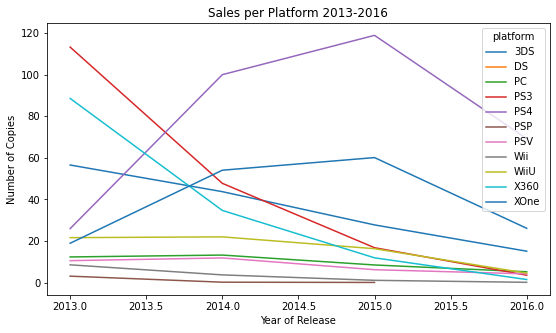

In [23]:
#visualize the data
(platforms_2013_2016.T
     .plot(figsize=(9,5), title='Sales per Platform 2013-2016')
     .set(xlabel='Year of Release', ylabel='Number of Copies'));

platforms_2013_2016.T.sum().sort_values(ascending=False).head()

To analyze how the release of new games changes across platforms during the relevant period, we can create a plot or visualization to depict the number of new game releases for each platform.

Let's create a pivot table and count the number of released games for each platform.

In [24]:
games_by_platform_2013_2016=df_2013_2016.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

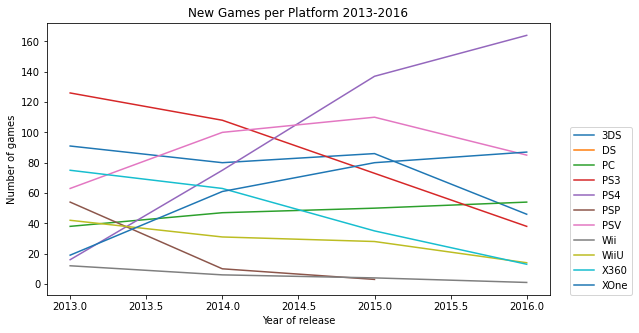

In [25]:
ax=games_by_platform_2013_2016.T.plot(figsize=(9,5), title='New Games per Platform 2013-2016');
ax.set(xlabel='Year of release', ylabel='Number of games')
plt.legend(loc=(1.04,0));

PS4 and 3DS, platforms that were introduced in 2013, showed active sales growth but stabilized by 2016. It is worth noting that the development of new platforms follows the same pattern as we observed in the original dataset. It is logical to assume that these platforms will experience a decline in sales and gradually lose market share after 2016.

Apart from the mentioned platforms, game sales declined.

The leaders in global sales during the relevant period are PS4, PS3, Xbox One (Xone), and 3DS.

To assess the global game sales by platforms, let's create a box plot.

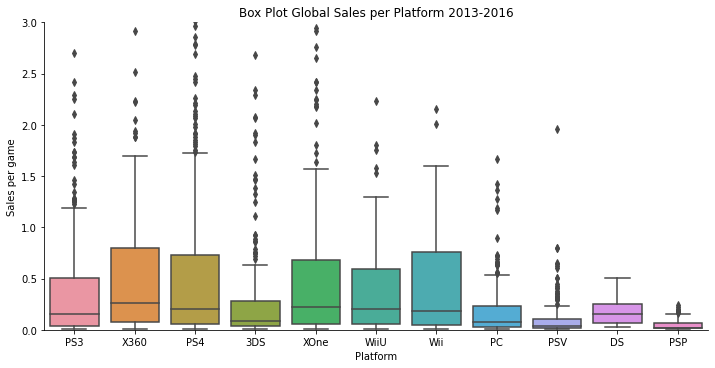

In [26]:
ax=sns.catplot(x="platform", y="total_sales",
            kind="box", dodge=False, data=df_2013_2016, height=5, aspect=2)\
            .set(title='Box Plot Global Sales per Platform 2013-2016', ylim=(0,3))
ax.set(xlabel='Platform', ylabel='Sales per game');

The data on global game sales by platforms is quite scattered, with profitable games falling outside the "whiskers" of the box plot.

The top four platforms are X360, PS4, Xone, and Wii.

On average, the lowest circulation per game is observed on the PSV and PSP platforms.

### Influence of user and critic reviews

To analyze the influence of user and critic reviews on game sales, we can create scatter plots or correlation matrices to visualize the relationship between review scores and sales.

In [27]:
#добавим столбец с суммой отзывов пользователей и критиков
#система оценки очевидно различается, следует нормировать 'user_score'
#df_2013_2016['total_score']=df_2013_2016['critic_score']+ df_2013_2016['user_score']*10

#отдельный датафрейм для игр на X360
X360_2013_2016=df_2013_2016.query('platform=="X360"')
pd.set_option('chained_assignment', None)
X360_2013_2016[X360_2013_2016.columns[4:]].corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
na_sales,1.000000,0.866574,0.634340,0.985236,0.342724,-0.012298,0.984299
eu_sales,0.866574,1.000000,0.612002,0.934769,0.336418,-0.009435,0.941008
jp_sales,0.634340,0.612002,1.000000,0.641529,0.290613,0.112592,0.648860
other_sales,0.985236,0.934769,0.641529,1.000000,0.349204,-0.018868,0.998640
critic_score,0.342724,0.336418,0.290613,0.349204,1.000000,0.520946,0.350345
user_score,-0.012298,-0.009435,0.112592,-0.018868,0.520946,1.000000,-0.011742
total_sales,0.984299,0.941008,0.648860,0.998640,0.350345,-0.011742,1.000000


Let's look at the Critic Score - Sales dependance 

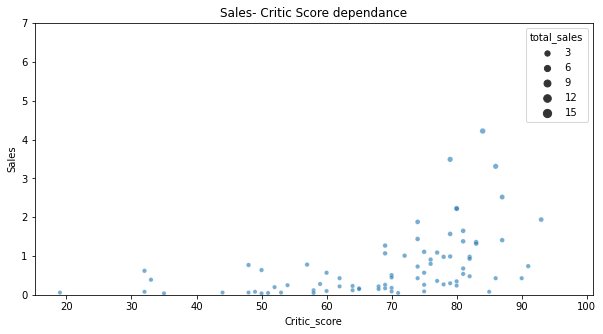

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(x="critic_score", y="total_sales", size="total_sales", data=X360_2013_2016, alpha=0.6).set(ylim=(0,7));
ax.set(xlabel='Сritic_score', ylabel='Sales', title='Sales- Critic Score dependance');

And for the user score:

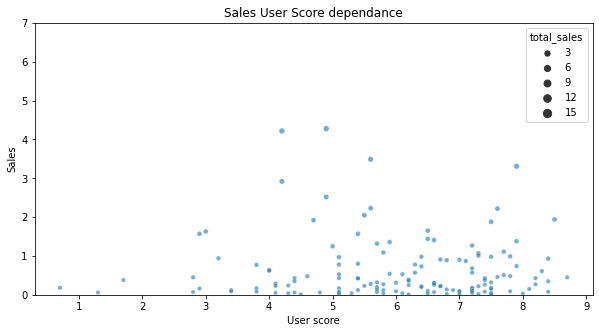

In [29]:
fig,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(x="user_score", y="total_sales", size="total_sales", data=X360_2013_2016, alpha=0.6).set(ylim=(0,7));
ax.set(xlabel='User score', ylabel='Sales', title='Sales User Score dependance');

The correlation between global sales and critic reviews is positive, with a coefficient of 0.35.

User reviews only show a positive correlation with sales in Japan, with a coefficient of 0.11.

At the same time, the Japanese market is more responsive to critic reviews, with a coefficient of 0.29.

From the scatter plot, we can observe that the majority of games on the Xbox 360 have sales of less than 2 million copies.
The correlation between total sales and cumulative user and critic scores has a coefficient of 0.2, indicating a higher correlation with critic scores.

### Let's evaluate the correlation on the other platforms

Let's use a loop to display scatter plots for each platform:

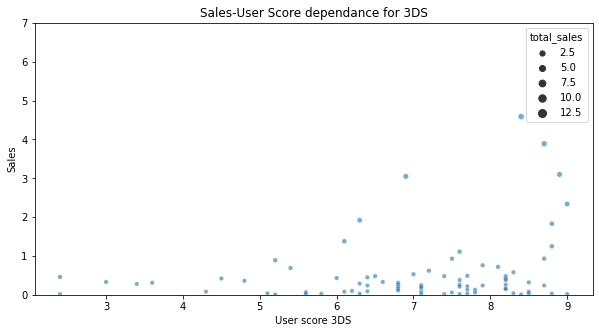

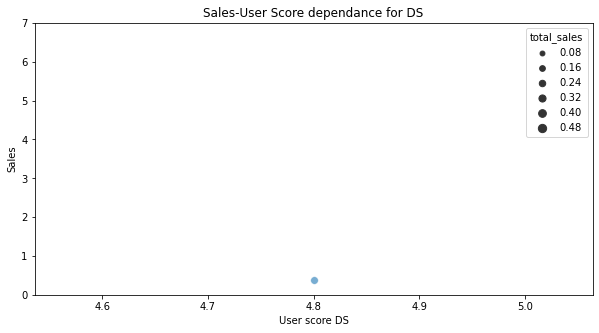

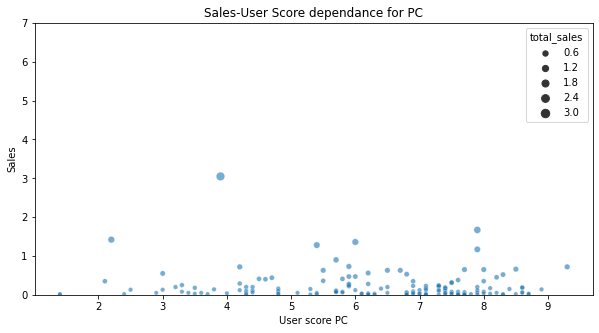

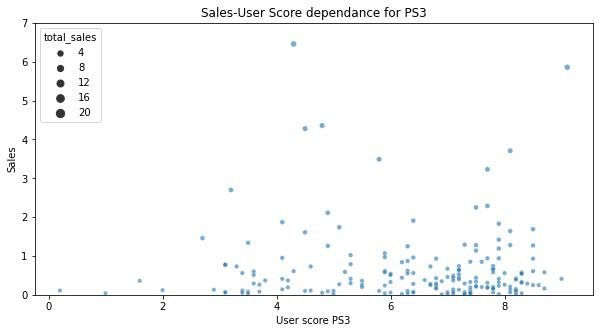

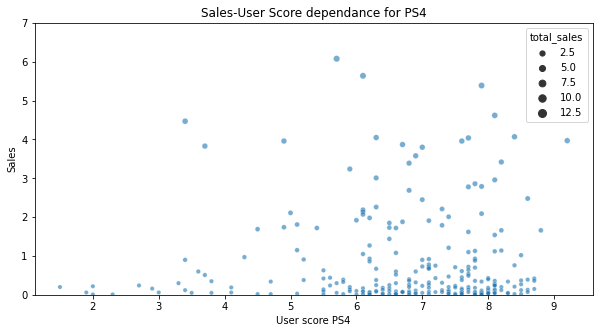

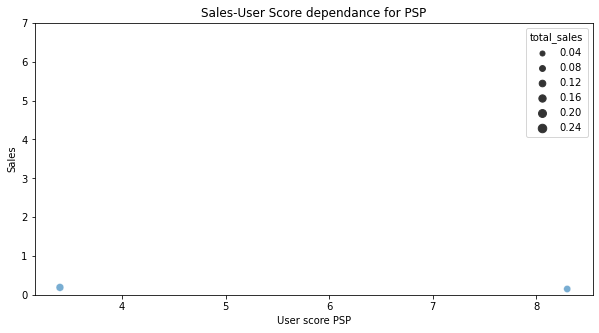

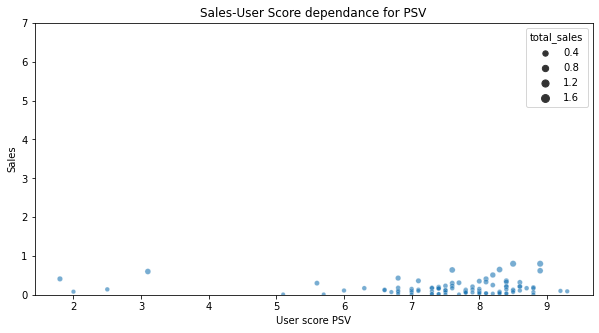

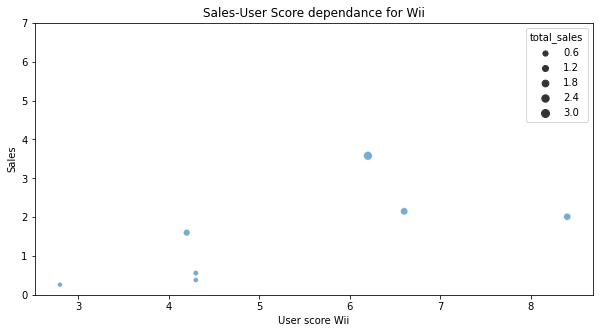

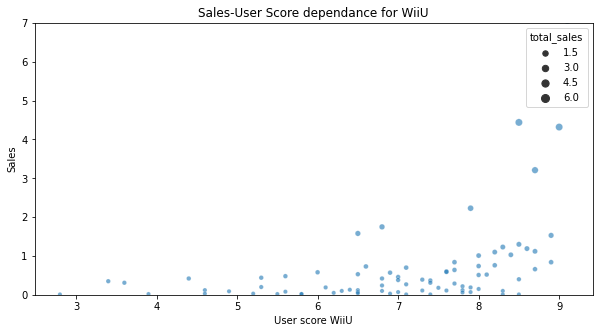

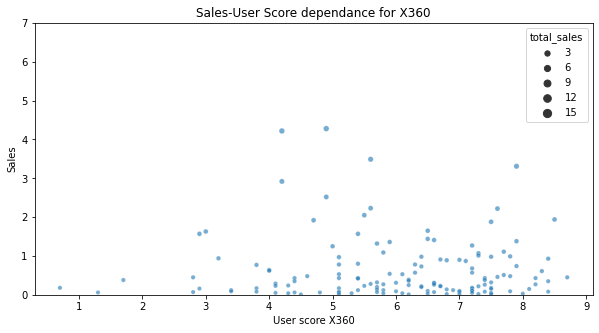

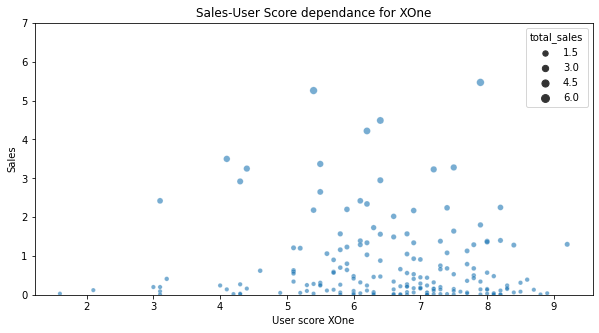

In [30]:
for p in platforms_2013_2016.index:
    plat_2013_2016=df_2013_2016.query('platform==@p')
    fig,ax=plt.subplots(figsize=(10,5))
    (sns.scatterplot(x="user_score", y="total_sales", size="total_sales", data=plat_2013_2016, alpha=0.6)
         .set(ylim=(0,7), title=p))
    ax.set(xlabel='User score' + ' '+p, ylabel='Sales', title='Sales-User Score dependance' + ' for '+p);

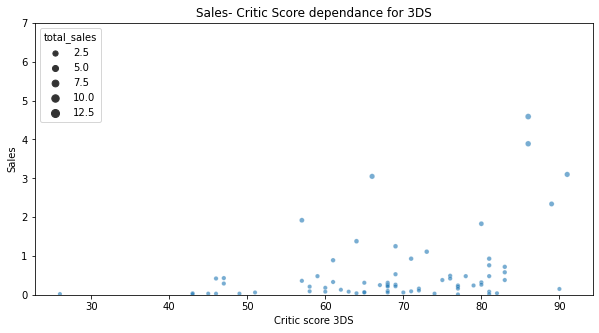

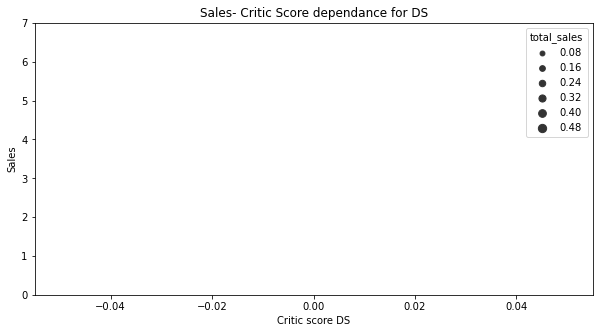

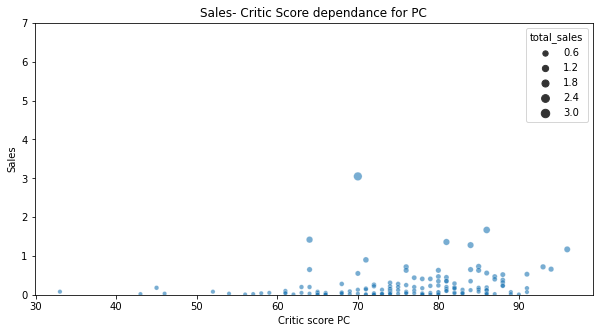

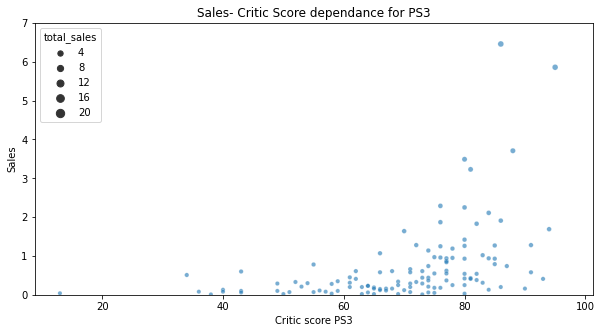

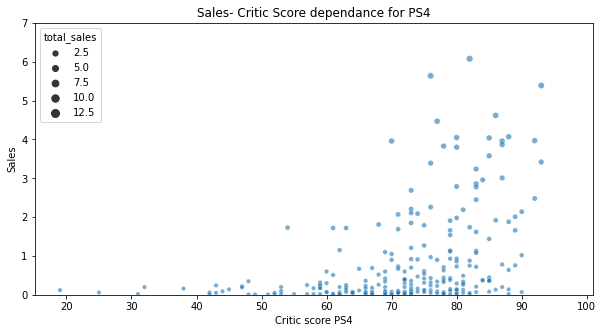

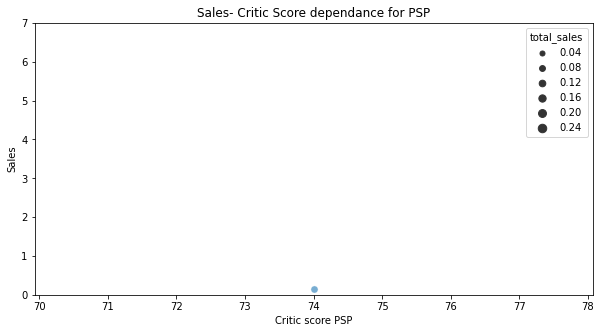

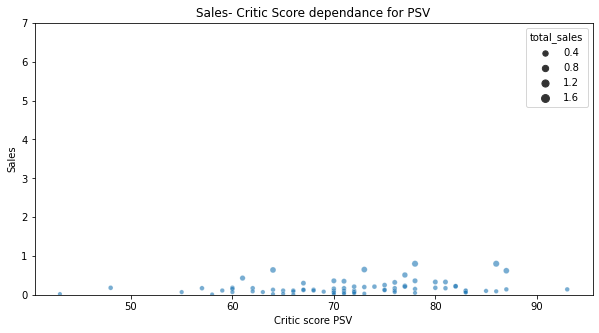

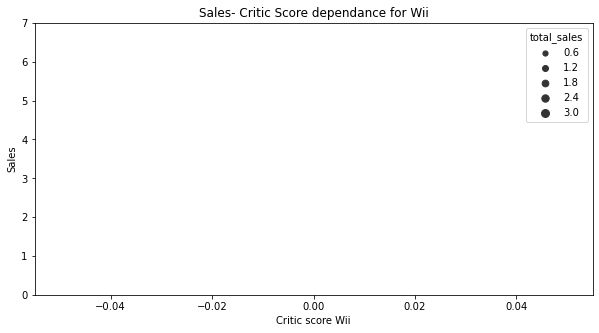

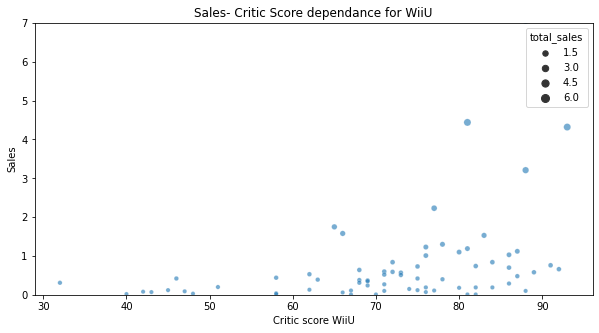

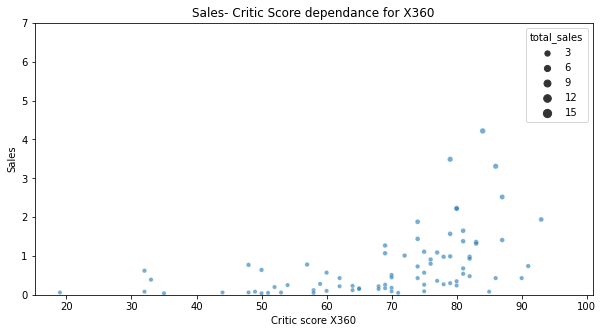

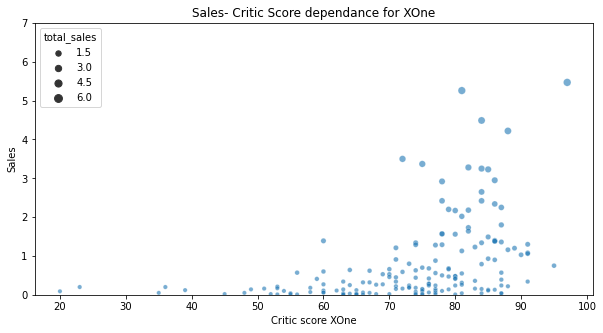

In [31]:
for p in platforms_2013_2016.index:
    plat_2013_2016=df_2013_2016.query('platform==@p')
    fig,ax=plt.subplots(figsize=(10,5))
    (sns.scatterplot(x="critic_score", y="total_sales", size="total_sales", data=plat_2013_2016, alpha=0.6)
         .set(ylim=(0,7), title=p))
    ax.set(xlabel='Critic score' + ' '+p, ylabel='Sales', title='Sales- Critic Score dependance' + ' for '+p);

**Cocnlusion:**

Games on the PC and PSV platforms do not demonstrate correlation with ratings.

On average, there is not a high correlation across platforms, so it would be beneficial to further investigate the review system on each platform, including understanding if the platform verifies the reviewers.
Games on the PS4 platform, despite achieving high sales, exhibit a wider range of ratings compared to games on the X360 platform, where the correlation was more significant.





### The most popular game genres.

Let's create a pivot table

In [32]:
genres_2013_2016=df_2013_2016.pivot_table(index='genre', values='total_sales', aggfunc=('count','sum'))
genres_2013_2016.columns=('Number of games', 'Total sales')
display(genres_2013_2016)

,Number of games,Total sales
genre,,
Action,766,321.87
Adventure,245,23.64
Fighting,80,35.31
Misc,155,62.82
Platform,74,42.63
Puzzle,17,3.17
Racing,85,39.89
Role-Playing,292,145.89
Shooter,187,232.98


And get a bar plot to visualize data

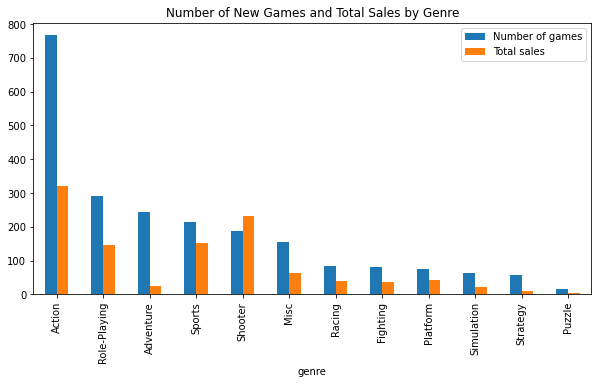

In [33]:
(genres_2013_2016.sort_values(by='Number of games', ascending=False)
     .plot(kind='bar', figsize=(10,5), title='Number of New Games and Total Sales by Genre'));

**Conclusion:**

Almost all genres have a significant number of commercially unsuccessful games.

The most commercially successful genre is action. At the same time, it also leads in terms of the number of new game releases.
Next, we can mention shooter - a genre closely related to action. It is the only genre where the revenue share is higher than the share of new game releases

## User profile for each region
### Top-5 platforms per region

In [34]:
sales_by_reg=(df_2013_2016
                        .pivot_table(index='platform', \
                                     values=('na_sales','eu_sales', 'jp_sales'), aggfunc='sum' ));
display(sales_by_reg)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


Let's display bar charts of the top 5 platforms by sales for each region:

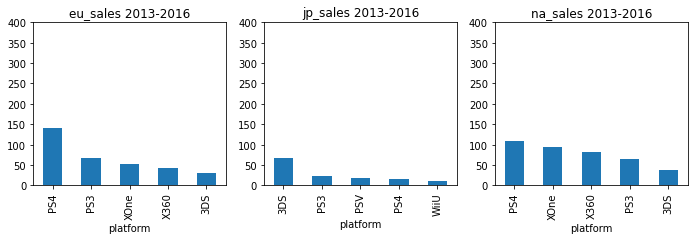

In [35]:
plt.figure(figsize=(20, 3))
for i, reg in enumerate(sales_by_reg.columns, 1):
    plt.subplot(1, 5, i)
    (sales_by_reg[reg].sort_values(ascending=False)
         .head(5)
         .plot(kind='bar', title=reg+' 2013-2016', x=plt.gca(),ylim=(0,400)))

**Conclusions:**

In North America and Europe, PS4 is leading, and the novelty factor has certainly played a role.

In the USA and Canada, the market shares of platforms are not as distinct, indicating that it is a key market for all consoles.

Japan is a unique market where PS4 ranks fourth, and Nintendo 3DS takes the lead. Working with this market would require additional research and analysis.

### Top genres

In [36]:
genres_by_reg=df_2013_2016.pivot_table(index='genre', values=('na_sales','eu_sales', 'jp_sales'), aggfunc='sum')
display (genres_by_reg)

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


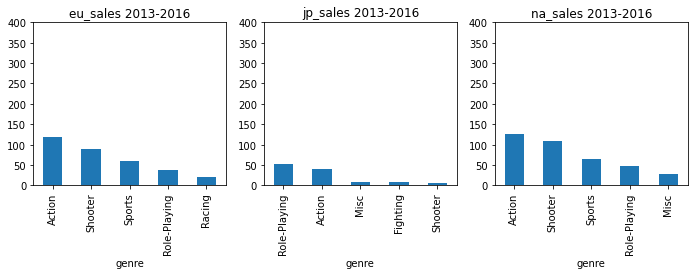

In [37]:
plt.figure(figsize=(20, 3))
for i, reg in enumerate(genres_by_reg.columns, 1):
    plt.subplot(1, 5, i)
    (genres_by_reg[reg].sort_values(ascending=False)
                                 .head(5)
                                 .plot(kind='bar', title=reg+' 2013-2016', x=plt.gca(),ylim=(0,400)));

**Conclusion:**

In Europe and North America, the leading genres are action and shooter, which aligns well with the correlation between global game sales and genre preferences.

In Japan, role-playing games (RPGs) take the lead, with action games following closely behind. This is likely influenced by cultural factors such as preferences for certain types of comics among children and teenagers, and how it impacts their identity, as well as the historical development of the gaming market.

### The ESRB rating and sales in each region

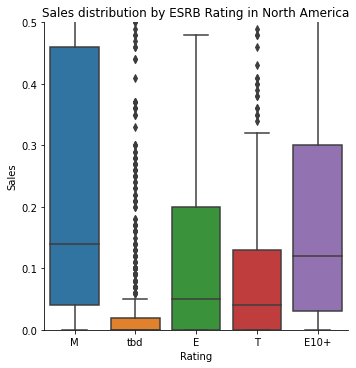

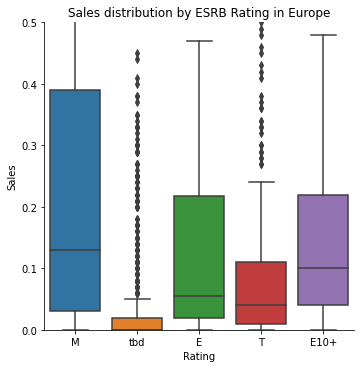

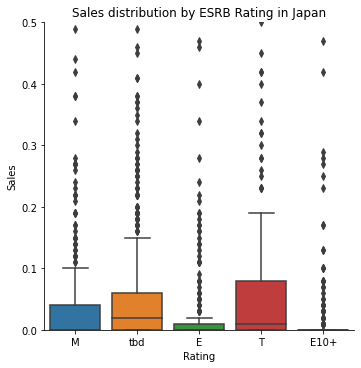

In [38]:
regions=['North America','Europe', 'Japan']
#fill the nan with 'tbd'
df_2013_2016['rating'] = df_2013_2016['rating'].fillna('tbd')
for i, y in zip(df_2013_2016.columns[4:8], regions):
    ax=sns.catplot(kind='box', data=df_2013_2016, x='rating', y=i).set(ylim=(0,0.5))
    ax.set(xlabel='Rating', ylabel='Sales', title='Sales distribution by ESRB Rating in '+ y);


In [39]:
ratings_by_reg=df_2013_2016.pivot_table(index='rating', values=('na_sales','eu_sales', 'jp_sales'), aggfunc='sum')
display (ratings_by_reg)

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
tbd,78.91,85.05,89.42


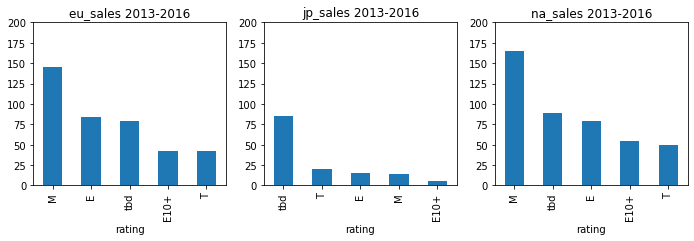

In [40]:
plt.figure(figsize=(20, 3))
for i, reg in enumerate(ratings_by_reg.columns, 1):
    plt.subplot(1, 5, i)
    (ratings_by_reg[reg].sort_values(ascending=False)
                               .plot(kind='bar', title=reg+' 2013-2016', x=plt.gca(),ylim=(0,200)));

### User profiles from each region and general conclusions:

Users from the United States and Canada prefer PS4, X360, and Xone platforms, with a preference for action and shooter genres. In terms of ESRB ratings, a significant portion of the market is occupied by games rated 10+.

The European market resembles the North American market. There are no significant differences in terms of genres, console types, and ESRB ratings.

The Japanese market stands out distinctly. Role-playing games (RPGs) are the most popular genre, with the 3DS platform leading the market. The T (for teens) category is popular in terms of ESRB ratings.

### Let's test the hypothesis 1:
H0: The average user ratings for Xbox One and PC platforms are the same.
H1: The average user ratings for Xbox One and PC platforms are different.

We'll use Student's t-test with a p-value of 0.05

In [41]:
#Create objects with the aggregated rating for two platforms
pc_user_score=df_2013_2016[df_2013_2016['platform']=="PC"]['user_score'].dropna()
x_one_user_score=df_2013_2016.query('platform=="XOne"')['user_score'].dropna()
#p value 5%
alpha=0.05
#student's t-test
results=st.ttest_ind(pc_user_score, x_one_user_score)
print('p_value = ', results.pvalue)
print('The average user rating for the PC platform is:', pc_user_score.median())
print('The average user rating for the Xone platform is:', x_one_user_score.median())

if(results.pvalue<alpha):
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

p_value =  0.14012658403611647
The average user rating for the PC platform is: 6.8
The average user rating for the Xone platform is: 6.8
Fail to reject the null hypothesis.


We failed to reject the hypothesis of equality of user ratings between PC and Xone platforms.

### Let's test the hypothesis 2:

H0: The average user ratings for Action and Sports video games are the same.

H0: The average user ratings for Action and Sports video games are different.

In [42]:
action_user_score=df_2013_2016.query('genre=="Action"')['user_score'].dropna()
sport_user_score=df_2013_2016.query('genre=="Sports"')['user_score'].dropna()
results=st.ttest_ind(action_user_score, sport_user_score)
print('p_value = ', results.pvalue)
print('The average user rating for Action games:', action_user_score.median())
print('СThe average user rating for Sport games:', sport_user_score.median())

if(results.pvalue<alpha):
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

p_value =  1.0517832389140023e-27
The average user rating for Action games: 7.1
СThe average user rating for Sport games: 5.5
We reject the null hypothesis.


We were able to reject the hypothesis of equality of user ratings between Action and Sports genres. The statistical significance of the alternative hypothesis has been confirmed.

## Conclusion:


During the study, we processed a dataset describing the statistics of game releases and sales from 1980 to 2016, with a breakdown by regions, genres, user ratings, and professional reviews. During the data preprocessing stage, we addressed missing values and data types. Based on the data quality, quantity, research goals, and considerations, we narrowed down the chronological scope to the years 2013 to 2016. The key regions of focus were North America, Europe, and Japan.

We discovered a consistent decline in both the number of new game releases and their total sales since 2012.

To release a potentially successful product, the following conclusions should be taken into account:

North America is the largest video game market, followed by Europe, Japan, and other countries.

The most popular games fall into the "M" and "T" (Mature and Teen) categories, primarily in the action genre. Critic reviews in the gaming industry hold genuine importance.

The average lifespan of a gaming platform does not exceed 6 years, so it is crucial to monitor hardware advancements and pay attention to the mobile gaming market.



